# Figure 03
## FOXSI3 Instrumentation Milo's paper
https://v2.overleaf.com/read/wcfwdbgdfgcc
### October 2018
### Milo BC @ UC Berkeley

### Goal:
<div class="alert alert-info">
Third figure - show energy distribution of the ghost rays. For several off-axis angles (and off course on-axis)
<div/>

Which input spectrum should I use? a flat one from 0 to 30 keV?<br/>
**I need to run the simulation for this energy response.**

In [3]:
## General packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
## Specific packages
from foxsisim.util import load_rays
from foxsisim.detector import Detector

In [76]:
angle = 32.0
## Rays location:
rays_folder = '/Users/Kamilobu/Desktop/Developer/Milo_FOXSI_Science/Paper_figures/rays_energy/F309R262/'

In [79]:
# Loading Rays:
Lrays = load_rays(rays_folder+'test_rays_Angle_=_'+str(angle)+'.csv')
# Fix little bug in rays:
for ray in Lrays:
    ray.hist = ray.hist.tolist()
# Create detector :
detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
# Detector Catch rays:
detector.catchRays(Lrays)

'''Defining D, H, and P rays'''
Drays = [ray for ray in Lrays if (ray.des[2]==230.0 and ray.bounces ==2 )]
Srays = [ray for ray in Lrays if (ray.des[2]==230.0 and ray.bounces ==0 and ray.tag[-8:] == 'Source-D')]
Hrays = [ray for ray in Lrays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
Prays = [ray for ray in Lrays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

Rays from /Users/Kamilobu/Desktop/Developer/Milo_FOXSI_Science/Paper_figures/rays_energy/F309R262/test_rays_Angle_=_32.0.csv loaded.


## Put the four spectra together in one figure

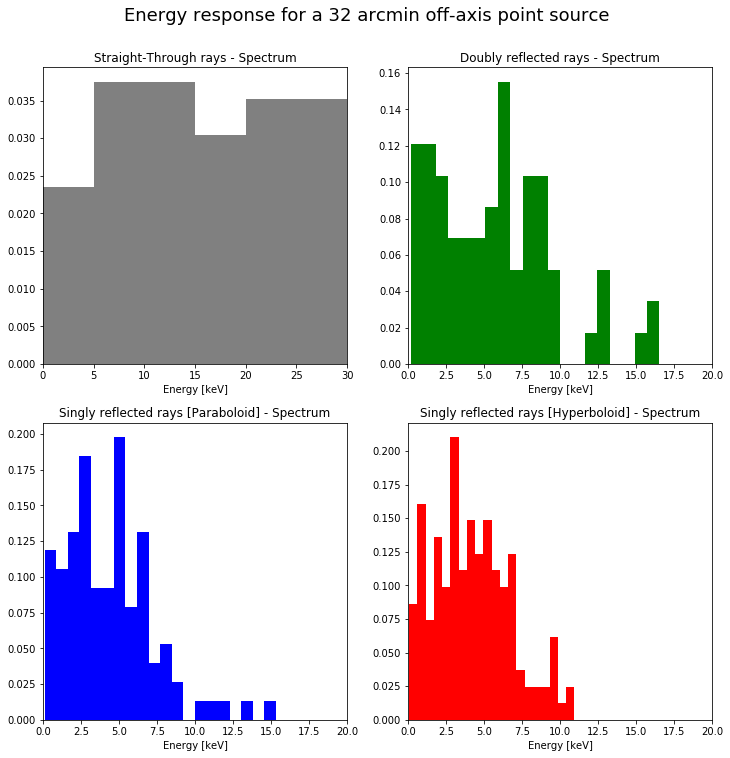

In [81]:
fig = plt.figure(figsize=(12,12))
st = fig.suptitle("Energy response for a 32 arcmin off-axis point source", fontsize=18,y=.95)
## Straight-Through
plt.subplot(2,2,1)
plt.hist([ray.energy for ray in Srays], density=True, label='rays on detector',color='grey',bins=20)
plt.xlabel('Energy [keV]')
plt.title('Straight-Through rays - Spectrum')
plt.xlim(0,30)
## Doubles
plt.subplot(2,2,2)
plt.hist([ray.energy for ray in Drays], density=True, label='rays on detector',color='g',bins=20)
plt.xlabel('Energy [keV]')
plt.title('Doubly reflected rays - Spectrum')
plt.xlim(0,20)
## Paraboloids
plt.subplot(2,2,3)
plt.hist([ray.energy for ray in Prays], density=True, label='rays on detector',color='b',bins=20)
plt.xlabel('Energy [keV]')
plt.title('Singly reflected rays [Paraboloid] - Spectrum')
plt.xlim(0,20)
## Hyperboloids
plt.subplot(2,2,4)
plt.hist([ray.energy for ray in Hrays], density=True, label='rays on detector',color='r',bins=20)
plt.xlabel('Energy [keV]')
plt.title('Singly reflected rays [Hyperboloid] - Spectrum')
plt.xlim(0,20)
plt.show()

In [74]:
len([ray for ray in Lrays if (ray.des[2]==230.0)])

7

In [75]:
[ray for ray in Lrays if (ray.des[2]==230.0)]

In [24]:
len([ray.energy for ray in detector.rays])

613

In [33]:
Drays = [ray for ray in Lrays if (ray.des[2]==230.0 and ray.bounces ==2)]

In [39]:
len(Drays),len(Srays),len(Prays),len(Hrays)

(84, 251, 113, 165)

In [40]:
len(Drays)+len(Srays)+len(Prays)+len(Hrays)

613